# HMM analysis

Here we will construct and analyze HMM models retrieved from MSAs. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## 1. Load the data

We are working only with the disordered regions, thus we should keep only the related information.


In [15]:
# Importing the libraries and functions
from functions import *

In [16]:
# Obtain the information about one Uniprot query ID
%store -r id_dis i
id_dis = id_dis
i = i
curated_disprot = pd.read_csv("curated_disprot.csv")
curated_query = curated_disprot[curated_disprot['acc'] == id_dis]

print(f"The number of disordered regions in the {id_dis} protein: {len(curated_query)}")
curated_query

The number of disordered regions in the Q86FP8 protein: 1


,acc,evidence,feature,source,start,end,length,region
894,Q86FP8,curated,disorder,disprot,20,80,61,Q86FP8_20-80


## 2. hmmsearch results analysis

After performing `hmmsearch` against RP 15% and RP 75%, we retrieve the dataframe `hmmsearch_results` with the statistics.

In [17]:
# # Retrieve the dataframe with the hmmsearch results RP 15%
# %store -r hmmsearch_results_rp_15
# print(f"Number of hmmsearch hits against RP 15% for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results_rp_15))
# hmmsearch_results_rp_15.head()

In [18]:
# # Retrieve the dataframe with the hmmsearch results RP 75%
# %store -r hmmsearch_results_rp_75
# print(f"Number of hmmsearch hits against RP 75% for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results_rp_75))
# hmmsearch_results_rp_75.head()

## 3. HMM and Pfam comparison
### 3.1 One MSA

We took the results of `hmmsearch` and performed a search against Interpro database. Thus we obtained the Pfam domains corresponding to the results from `hmmsearch`.

In [19]:
# Create a dataframe of Pfam regions (RP 15%) - for one MSA
pfam_overlap_rp_15 = pd.read_csv(f"results/pfam/pfam_overlap/rp_15/pfam_rp_15_{id_dis}_{i}.csv")
print(f"The number of regions for the {i} disordered region of the {id_dis} protein in Interpro (RP 15%):", len(pfam_overlap_rp_15))
print("The retrieved Pfam domains:", list(set(pfam_overlap_rp_15['pfam_id'])))
pfam_overlap_rp_15.head()

The number of regions for the 1 disordered region of the Q86FP8 protein in Interpro (RP 15%): 556
The retrieved Pfam domains: ['PF00096', 'PF00561', 'PF00089', 'PF02582', 'PF00724', 'PF01380', 'PF13537', 'PF02463']


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A016UWB3,PF01380,IPR001347,173,300,128,104,155,52,0,0.0,0.0,215,0.0
1,A0A016UWB3,PF01380,IPR001347,343,432,90,104,155,52,0,0.0,0.0,517,0.0
2,A0A016UWX5,PF01380,IPR001347,202,329,128,133,184,52,0,0.0,0.0,215,0.0
3,A0A016UWX5,PF01380,IPR001347,372,461,90,133,184,52,0,0.0,0.0,517,0.0
4,A0A059LFS6,PF01380,IPR001347,155,283,129,92,140,49,0,0.0,0.0,207,0.0


In [20]:
# Create a dataframe of Pfam regions (RP 75%) - for one MSA
pfam_overlap_rp_75 = pd.read_csv(f"results/pfam/pfam_overlap/rp_75/pfam_rp_75_{id_dis}_{i}.csv")
print(f"The number of regions for the {i} disordered region of the {id_dis} protein in Interpro (RP 75%):", len(pfam_overlap_rp_75))
print("The retrieved Pfam domains:", list(set(pfam_overlap_rp_75['pfam_id'])))
pfam_overlap_rp_75.head()

The number of regions for the 1 disordered region of the Q86FP8 protein in Interpro (RP 75%): 2565
The retrieved Pfam domains: ['PF00096', 'PF00004', 'PF00085', 'PF02737', 'PF16450', 'PF12936', 'PF07714', 'PF00078', 'PF17862', 'PF00069', 'PF00725', 'PF01380', 'PF13537']


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A010QN55,PF01380,IPR001347,381,508,128,330,362,33,0,0.0,0.0,198,0.0
1,A0A010QN55,PF01380,IPR001347,553,682,130,330,362,33,0,0.0,0.0,544,0.0
2,A0A016UWB3,PF01380,IPR001347,173,300,128,104,155,52,0,0.0,0.0,215,0.0
3,A0A016UWB3,PF01380,IPR001347,343,432,90,104,155,52,0,0.0,0.0,517,0.0
4,A0A016UWX5,PF01380,IPR001347,202,329,128,133,184,52,0,0.0,0.0,215,0.0


Then we compare the HMM and Pfam model length with the Disprot.

In [21]:
# Get the length of the disordered region
length = curated_query['length'].iloc[i-1]
print(f"The length of the {i} region of the {id_dis}:", length)

The length of the 1 region of the Q86FP8: 61


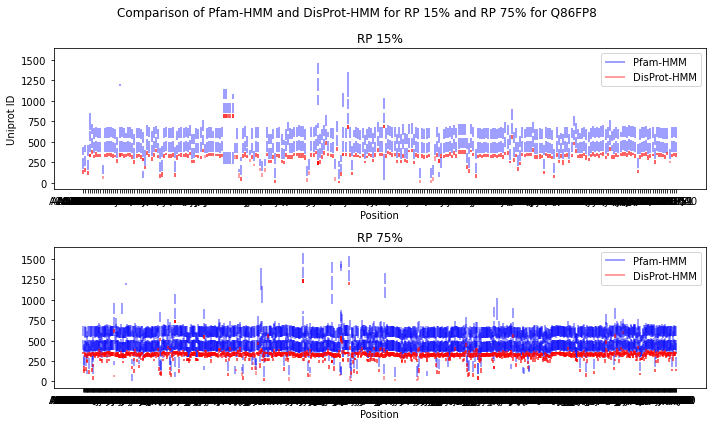

In [22]:
# One query
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(2, 1, sharey=True)

# Subplot 1: RP 15%
ax[0].vlines(pfam_overlap_rp_15['uniprot_id'], pfam_overlap_rp_15['start_pfam'], pfam_overlap_rp_15['end_pfam'],
             alpha=0.5, color='blue', label='Pfam-HMM')

ax[0].vlines(pfam_overlap_rp_15['uniprot_id'], pfam_overlap_rp_15['ali_from'], pfam_overlap_rp_15['ali_to'],
             alpha=0.5, color='red', label='DisProt-HMM')

ax[0].set_ylabel('Uniprot ID')
ax[0].set_xlabel('Position')
ax[0].set_title('RP 15%')
ax[0].legend()

# Subplot 2: RP 75%
ax[1].vlines(pfam_overlap_rp_75['uniprot_id'], pfam_overlap_rp_75['start_pfam'], pfam_overlap_rp_75['end_pfam'],
             alpha=0.5, color='blue', label='Pfam-HMM')

ax[1].vlines(pfam_overlap_rp_75['uniprot_id'], pfam_overlap_rp_75['ali_from'], pfam_overlap_rp_75['ali_to'],
             alpha=0.5, color='red', label='DisProt-HMM')

ax[1].set_xlabel('Position')
ax[1].set_title('RP 75%')
ax[1].legend()

plt.suptitle(f"Comparison of Pfam-HMM and DisProt-HMM for RP 15% and RP 75% for {id_dis}")
plt.tight_layout()
plt.show()

### 3.2 Analysis of all results
### 3.2.1 RP 15%

In [23]:
# Load the pfam_hmm_rp_15 dataframe - including curated DisProt
pfam_hmm_rp_15 = pd.read_csv('results/pfam/pfam_hmm_rp_15.csv')
pfam_hmm_rp_15_1 = pd.read_csv('results/pfam/pfam_hmm_rp_15_1.csv')
print("The number of hmmsearch results for RP 15%:", len(pfam_hmm_rp_15))
# pfam_hmm_rp_15.head()

The number of hmmsearch results for RP 15%: 1655


In [24]:
# Load the pfam_hmm_rp_75 dataframe - including curated DisProt
pfam_hmm_rp_75 = pd.read_csv('results/pfam/pfam_hmm_rp_75.csv')
pfam_hmm_rp_75_1 = pd.read_csv('results/pfam/pfam_hmm_rp_75_1.csv')
print("The number of hmmsearch results for RP 15%:", len(pfam_hmm_rp_75))
# pfam_hmm_rp_75.head()

The number of hmmsearch results for RP 15%: 23010


In the following dataframes I directly compared two models: Pfam-HMM and DisProt-HMM. 

3 types of overlap were calculated:
- the common part divided by Pfam-HMM length (`overl_pfam`)
- the common part divided by DisProt-HMM length (`overl_hmm`)
- and the overall overlap: the common part divided by the **maximum length** combined by Pfam-HMM and DisProt-HMM lengths together (`overl_perc`).

In [25]:
# RP 15%, overlap between Pfam-HMM and DisProt-HMM
pfam_hmm_rp_15_1.head()

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A2K5X283,PF16959,IPR031588,617,770,154,769,805,37,2,1.30,5.41,188,1.06
1,A0A2K6SBD4,PF16959,IPR031588,618,770,153,769,805,37,2,1.31,5.41,187,1.06
2,A0A6J7ZVR2,PF00754,IPR000421,16,86,71,173,189,17,0,0.00,0.00,261,0.00
3,A0A6J7ZVR2,PF00754,IPR000421,149,255,107,173,189,17,17,15.89,100.00,91,15.89
4,A0A6J7ZVR2,PF00754,IPR000421,294,400,107,173,189,17,0,0.00,0.00,333,0.00


In [26]:
# RP 75%, overlap between Pfam-HMM and DisProt-HMM
pfam_hmm_rp_75_1.head()

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A060VYC8,PF07686,IPR013106,21,101,81,15,110,96,81,100.0,84.38,16,84.38
1,A0A060VYC8,PF08205,IPR013162,119,197,79,15,110,96,0,0.0,0.00,192,0.00
2,A0A060W1A4,PF07686,IPR013106,23,99,77,18,110,93,77,100.0,82.80,17,82.80
3,A0A060W1A4,PF08205,IPR013162,118,195,78,18,110,93,0,0.0,0.00,186,0.00
4,A0A060WNT4,PF07686,IPR013106,27,108,82,21,116,96,82,100.0,85.42,15,85.42


### Models comparison (Pfam-HMM and DisProt-HMM)

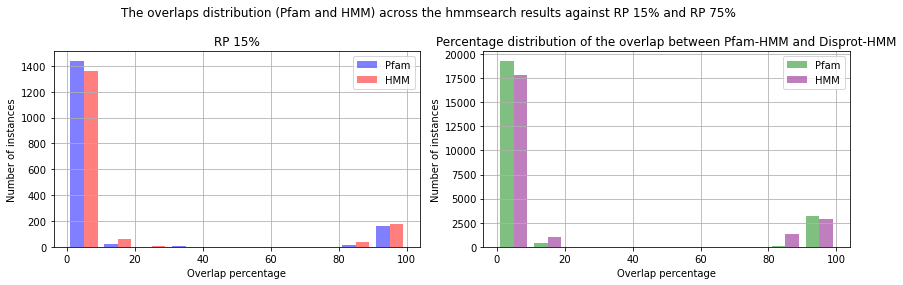

In [88]:
# Plot the histogram of overlaps % for Pfam and HMM
plt.rcParams['figure.figsize'] = [12, 4]
fig, ax = plt.subplots(1, 2, sharex=True)

ax[0].hist([pfam_hmm_rp_15_1['overl_pfam'], pfam_hmm_rp_15_1['overl_hmm']],
             bins=10, alpha=0.5, color=['blue', 'red'],
             label=['Pfam', 'HMM'])

ax[1].hist([pfam_hmm_rp_75_1['overl_pfam'], pfam_hmm_rp_75_1['overl_hmm']],
             bins=10, alpha=0.5, color=['green', 'purple'],
             label=['Pfam', 'HMM'])

ax[0].set_xlabel('Overlap percentage')
ax[1].set_xlabel('Overlap percentage')
ax[0].set_ylabel('Number of instances')
ax[1].set_ylabel('Number of instances')

ax[0].set_title('RP 15%')
ax[1].set_title('Percentage distribution of the overlap between Pfam-HMM and Disprot-HMM')

ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

plt.suptitle("The overlaps distribution (Pfam and HMM) across the hmmsearch results against RP 15% and RP 75%")
plt.tight_layout()
plt.show()

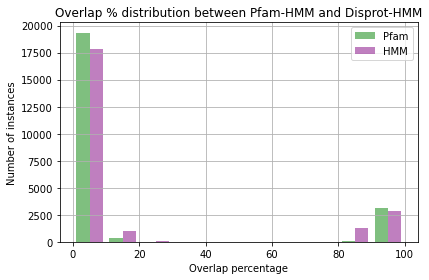

In [91]:
# Plot the histogram of overlaps % for Pfam and HMM
plt.rcParams['figure.figsize'] = [6, 4]

plt.hist([pfam_hmm_rp_75_1['overl_pfam'], pfam_hmm_rp_75_1['overl_hmm']],
             bins=10, alpha=0.5, color=['green', 'purple'],
             label=['Pfam', 'HMM'])

plt.xlabel('Overlap percentage')
plt.ylabel('Number of instances')
plt.title('Overlap % distribution between Pfam-HMM and Disprot-HMM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Calculate how many models do not overlap
zero_count_rp_15 = (pfam_hmm_rp_15_1['overl_perc'] == 0).sum()
total_count_rp_15 = len(pfam_hmm_rp_15_1)
percentage_rp_15 = "{:.2f}".format((zero_count_rp_15 / total_count_rp_15) * 100)

zero_count_rp_75 = (pfam_hmm_rp_75_1['overl_perc'] == 0).sum()
total_count_rp_75 = len(pfam_hmm_rp_75_1)
percentage_rp_75 = "{:.2f}".format((zero_count_rp_75 / total_count_rp_75) * 100)

print(f"Non-overlapping models count (RP 15%): {zero_count_rp_15}", "\n"
     f"The share of non-overlapping models (RP 15%): {percentage_rp_15}%")
print(f"Non-overlapping models count (RP 75%): {zero_count_rp_75}", "\n"
     f"The share of non-overlapping models (RP 75%): {percentage_rp_75}%")

Non-overlapping models count (RP 15%): 1336 
The share of non-overlapping models (RP 15%): 80.92%
Non-overlapping models count (RP 75%): 16959 
The share of non-overlapping models (RP 75%): 73.70%


In [67]:
nz_rp_15 = pfam_hmm_rp_15_1[pfam_hmm_rp_15_1['overl_perc'] != 0]
print("The number of overlapping models (RP 15%):", len(nz_rp_15))
nz_rp_15.head()

The number of overlapping models: 315


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A2K5X283,PF16959,IPR031588,617,770,154,769,805,37,2,1.30,5.41,188,1.06
1,A0A2K6SBD4,PF16959,IPR031588,618,770,153,769,805,37,2,1.31,5.41,187,1.06
3,A0A6J7ZVR2,PF00754,IPR000421,149,255,107,173,189,17,17,15.89,100.00,91,15.89
6,A0A6J8A0D7,PF00754,IPR000421,149,255,107,173,189,17,17,15.89,100.00,91,15.89
8,C7ECU5,PF16959,IPR031588,617,770,154,769,805,37,2,1.30,5.41,188,1.06


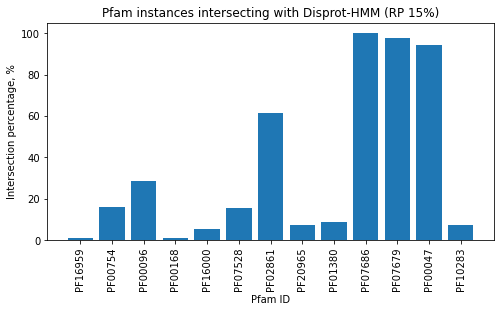

In [78]:
plt.bar(nz_rp_15['pfam_id'], nz_rp_15['overl_perc'])
plt.xticks(rotation=90)
plt.title("Pfam instances intersecting with Disprot-HMM (RP 15%)")
plt.xlabel("Pfam ID")
plt.ylabel("Intersection percentage, %")
plt.show()

In [68]:
nz_rp_75 = pfam_hmm_rp_75_1[pfam_hmm_rp_75_1['overl_perc'] != 0]
print("The number of overlapping models (RP 75%):", len(nz_rp_75))
nz_rp_75.head()

The number of overlapping models (RP 75%): 6051


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overl_len,overl_pfam,overl_hmm,non_overl_len,overl_perc
0,A0A060VYC8,PF07686,IPR013106,21,101,81,15,110,96,81,100.00,84.38,16,84.38
2,A0A060W1A4,PF07686,IPR013106,23,99,77,18,110,93,77,100.00,82.80,17,82.80
4,A0A060WNT4,PF07686,IPR013106,27,108,82,21,116,96,82,100.00,85.42,15,85.42
6,A0A060X0X8,PF00047,IPR013151,17,105,89,17,96,80,80,89.89,100.00,10,89.89
8,A0A060X911,PF07686,IPR013106,31,112,82,25,120,96,82,100.00,85.42,15,85.42


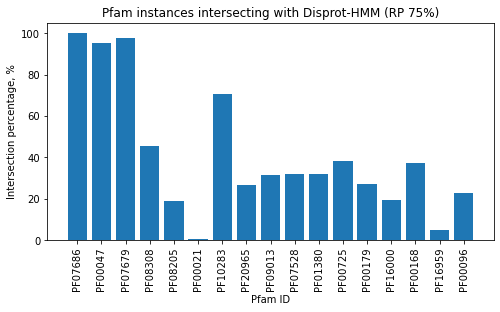

In [79]:
plt.bar(nz_rp_75['pfam_id'], nz_rp_75['overl_perc'])
plt.xticks(rotation=90)
plt.title("Pfam instances intersecting with Disprot-HMM (RP 75%)")
plt.xlabel("Pfam ID")
plt.ylabel("Intersection percentage, %")
plt.show()

### Models comparison with DisProt
In this part I've taken into account the overlap between two models (Pfam-HMM and DisProt-HMM) with the regions given in the curated DisProt database.

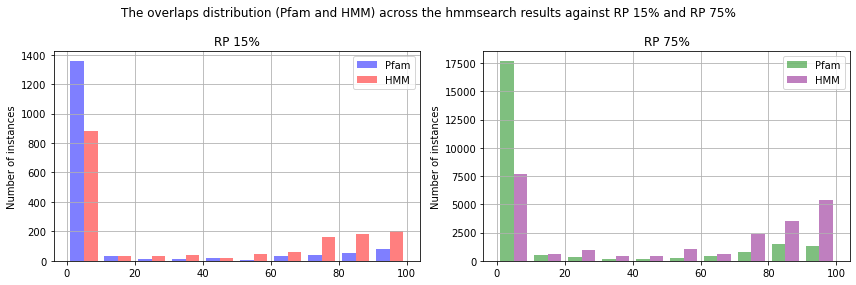

In [28]:
# Plot the histogram of overlaps % for Pfam and HMM
plt.rcParams['figure.figsize'] = [12, 4]
fig, ax = plt.subplots(1, 2, sharex=True)

ax[0].hist([pfam_hmm_rp_15['overlap_pfam_%'], pfam_hmm_rp_15['overlap_hmm_%']],
             bins=10, alpha=0.5, color=['blue', 'red'],
             label=['Pfam', 'HMM'])

ax[1].hist([pfam_hmm_rp_75['overlap_pfam_%'], pfam_hmm_rp_75['overlap_hmm_%']],
             bins=10, alpha=0.5, color=['green', 'purple'],
             label=['Pfam', 'HMM'])

ax[0].set_ylabel('Number of instances')
ax[1].set_ylabel('Number of instances')

ax[0].set_title('RP 15%')
ax[1].set_title('RP 75%')

ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

plt.suptitle("The overlaps distribution (Pfam and HMM) across the hmmsearch results against RP 15% and RP 75%")
plt.tight_layout()
plt.show()

In [84]:
pfam_hmm_rp_75['overlap_pfam_%'].mean()

16.481287266406163

In [85]:
pfam_hmm_rp_75['overlap_hmm_%'].mean()

50.633791829639634

In [86]:
pfam_hmm_rp_75['overlap_hmm_%'].mean() - pfam_hmm_rp_75['overlap_pfam_%'].mean()

34.15250456323347

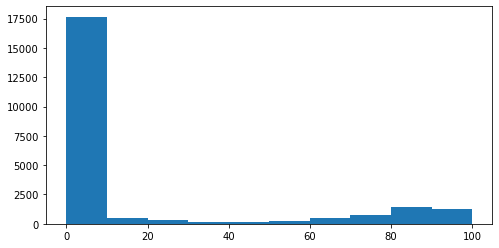

In [83]:
plt.hist(pfam_hmm_rp_75['overlap_pfam_%'])
plt.show()

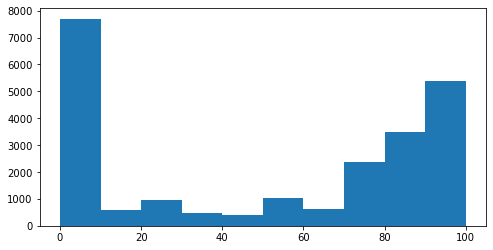

In [82]:
plt.hist(pfam_hmm_rp_75['overlap_hmm_%'])
plt.show()